# Questions 4: Which characteristics of a software developer do foster the use of AI search and development tools

In [1]:
# List all imported modules and functions / classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from my_functions import filter_columns_from_data_source





## Gather data
Start with a large number of developer characteristics as features and the reply to the questions whether developer use AI tools in their development process. Possible replies: Yes; No, but plan to soon; No, and don't plan to.
Read data set from source: https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2024.zip

In [2]:
selected_columns=[ 
    "Employment", # categorized employment
    "Age", # categorized age 
    "EdLevel", # categorized primary, secondary, college / university without degree, Associated ,Bachelor , Master , professional degree , else  / 
    "YearsCode",
    "YearsCodePro",
    "OrgSize",# categorized organizational size
    "AISelect", # categrical use AI in current workflow Yes, NO, but I plan to soon No, and I don not plan to  
]

df_filtered=filter_columns_from_data_source(selected_columns,"survey_results_public.csv")
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Employment    65437 non-null  object
 1   Age           65437 non-null  object
 2   EdLevel       60784 non-null  object
 3   YearsCode     59869 non-null  object
 4   YearsCodePro  51610 non-null  object
 5   OrgSize       47480 non-null  object
 6   AISelect      60907 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


## Clean data
As a first step only valid replies for the use of AI tools are taken into account. That is missing replies to this question "Do you currently use AI tools in your development process?" are removed.
To have a data set which contains the initaable to handle nan in the features without changing the distiribution a new category for each column apart from the target column is introduced whcalled "Missing"
Step 1: pre-clean the target column AISelect


In [3]:
df_precleaned=df_filtered.dropna(subset=["AISelect"])


Fill all nan with the newly introduced Missing category for each feature column

In [4]:
df_clean=df_precleaned.fillna("Missing")

Step 3: Check that the distribution of replies remains comparable

Initial replies in AISelect: ['Yes' "No, and I don't plan to" 'No, but I plan to soon']
Replies in AISelect after cleaning (removing nan): ['Yes' "No, and I don't plan to" 'No, but I plan to soon']
<class 'pandas.core.frame.DataFrame'>
Index: 60907 entries, 0 to 65435
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Employment    60907 non-null  object
 1   Age           60907 non-null  object
 2   EdLevel       60907 non-null  object
 3   YearsCode     60907 non-null  object
 4   YearsCodePro  60907 non-null  object
 5   OrgSize       60907 non-null  object
 6   AISelect      60907 non-null  object
dtypes: object(7)
memory usage: 3.7+ MB


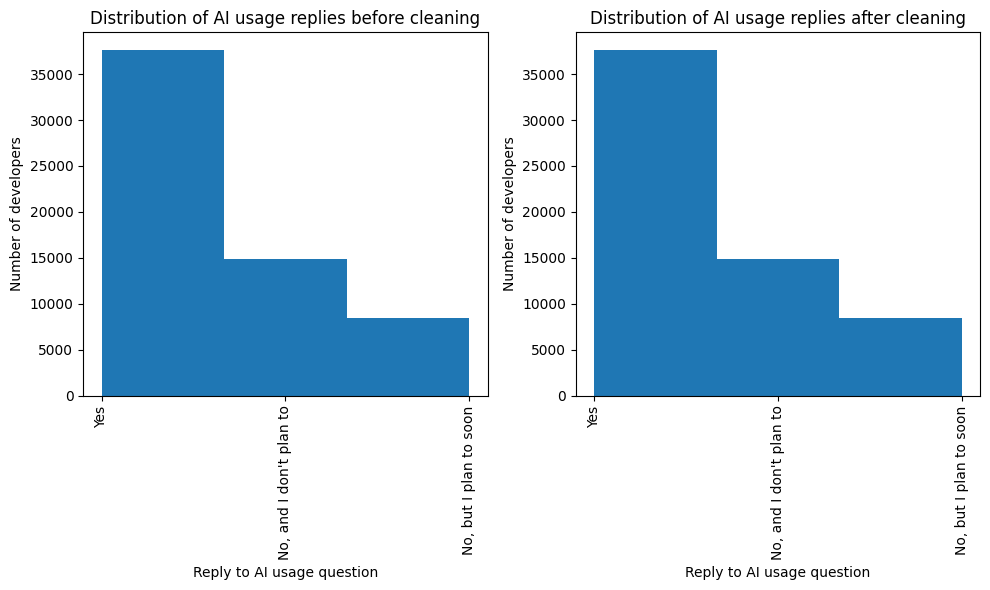

In [5]:
# check that there are enough variations in the target column AISelect, i.e. all three categories are still present
precleaned_replies=df_precleaned["AISelect"].unique()
after_cleaning_replies=df_clean["AISelect"].unique()
print(f"Initial replies in AISelect: {precleaned_replies}")
print(f"Replies in AISelect after cleaning (removing nan): {after_cleaning_replies}")

df_clean.info()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df_precleaned["AISelect"],bins=3,weights=[1]*len(df_precleaned["AISelect"]))
plt.title("Distribution of AI usage replies before cleaning")
plt.xticks(rotation=90)
plt.xlabel("Reply to AI usage question")
plt.ylabel("Number of developers")
plt.subplot(1, 2, 2) 
plt.hist(df_clean["AISelect"],bins=3,weights=[1]*len(df_clean["AISelect"]))
plt.title("Distribution of AI usage replies after cleaning")
plt.xticks(rotation=90)
plt.xlabel("Reply to AI usage question")
plt.ylabel("Number of developers")
plt.tight_layout()

## Data preparation
The target contains three strings and should be categorized for further analysis. In addition the feature also contains strings which will be categorized using the one hot encoding to avoid artificial ordinality 

In [6]:
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(df_clean["AISelect"])

df_X=df_clean.drop(["AISelect"],axis=1)


cat_columns=df_X.select_dtypes(include=["object","category"]).columns
current_encoder=OneHotEncoder(sparse_output=False)
X_encoded=current_encoder.fit_transform(df_X)


 



## Analyse data 
To identify the most relevant feature from the seleced developer characteristics the above prepared target (y_encoded) and feature data (X_ecnoded) are used to evaluate the importance of the features with the aim of reducing the number of required features for the targeted model.
* Step 1: Generate test and training data

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y_encoded,test_size=0.2,random_state=42)



* Step 2: create RandomForestClassifier to determine the feature importance and train the classifier varying the tree depth to determine the optimal value.

In [8]:
max_depth_variation_list=[ 5, 15, 30, 60]
for max_depth_value in max_depth_variation_list:
    rfc_model=RandomForestClassifier(max_depth=max_depth_value,random_state=42)
    rfc_model.fit(X_train,y_train)
    y_pred_train = rfc_model.predict(X_train)
    y_pred_test  = rfc_model.predict(X_test)

    acc_train_opt = accuracy_score(y_pred_train, y_train)
    acc_test_opt = accuracy_score(y_pred_test, y_test)
    print(f"Accurracy for tree depth {max_depth_value}")
    print(f"\t Training data: {acc_train_opt}")
    print(f"\t Test data    : {acc_test_opt}")    
    
    

Accurracy for tree depth 5
	 Training data: 0.6189020010261672
	 Test data    : 0.619520604170087
Accurracy for tree depth 15
	 Training data: 0.6260030785017958
	 Test data    : 0.6209981940568051
Accurracy for tree depth 30
	 Training data: 0.7031913801949717
	 Test data    : 0.6180430142833689
Accurracy for tree depth 60
	 Training data: 0.8272139558748076
	 Test data    : 0.5800361188638975


With increasing depth the accuracy for the training data improves and the accuracy for the test date starts to decrease which indicates a tendency of the model for overfitting.
The low value for the accuracy indicates already that a model to predict the attitude towards the use of AI cannot reliably predicted using the features above.
Based on the variation outcome a tree depth of 15 is choosen for the next steps in feature importance analysis
* Step 3: Evaluate the feature importance for the current set

In [9]:
rfc_model=RandomForestClassifier(max_depth=15,random_state=42)
rfc_model.fit(X_train,y_train)


importances=rfc_model.feature_importances_
feature_names = current_encoder.get_feature_names_out(input_features=df_X.columns)

feature_importances=pd.Series(importances,index=feature_names)

feature_importances=feature_importances.sort_values(ascending=False)

feature_importances.head(10)

Age_18-24 years old                                     0.041940
Age_55-64 years old                                     0.041287
EdLevel_Missing                                         0.039516
YearsCode_Missing                                       0.028049
Age_25-34 years old                                     0.026535
EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)    0.026023
Age_65 years or older                                   0.023952
Employment_Employed, full-time                          0.021504
Age_45-54 years old                                     0.020922
Employment_Retired                                      0.020670
dtype: float64

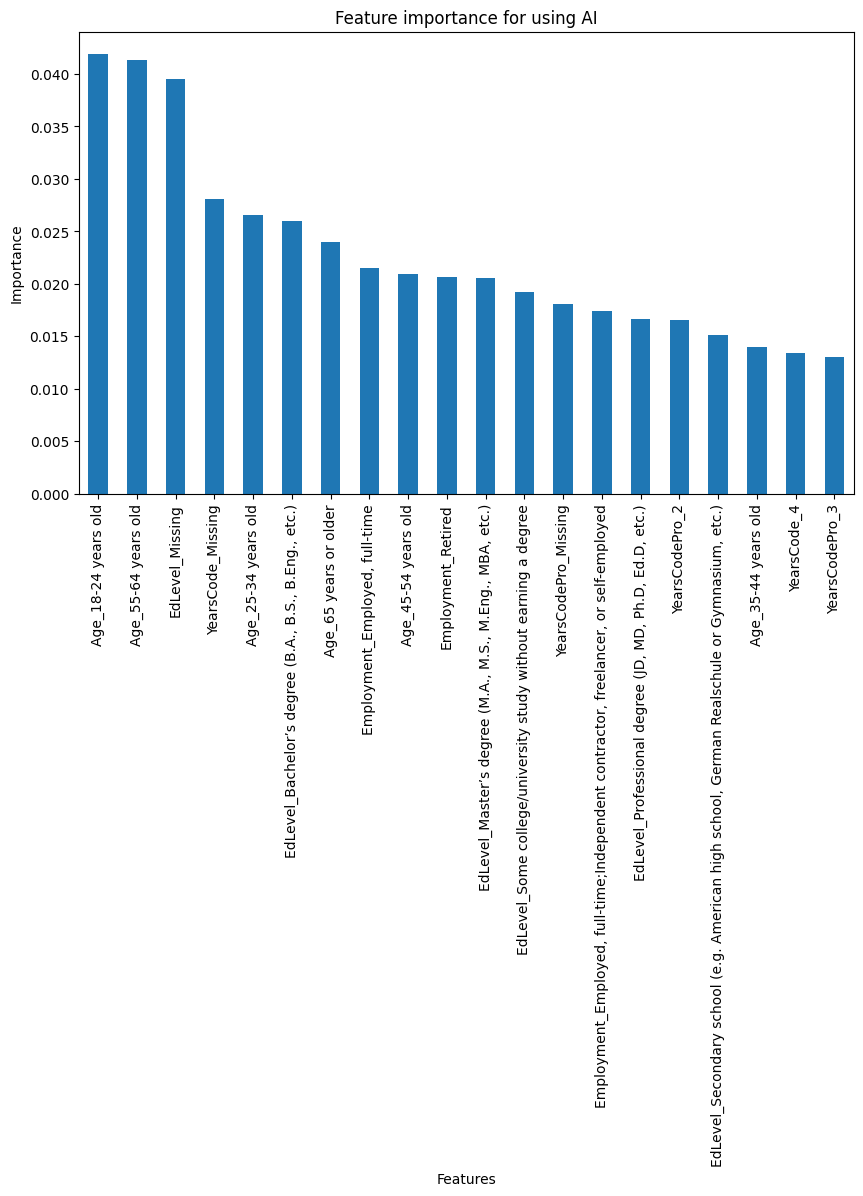

In [10]:
# plot sorted feature list 
plt.figure(figsize=(10,6))
feature_importances.head(20).plot(kind="bar")
plt.title("Feature importance for using AI")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

* Step 4: For a simple interpretation revert back to the original features calculating the importance as sum over all original feature categories and visualize the sorted feature importance.

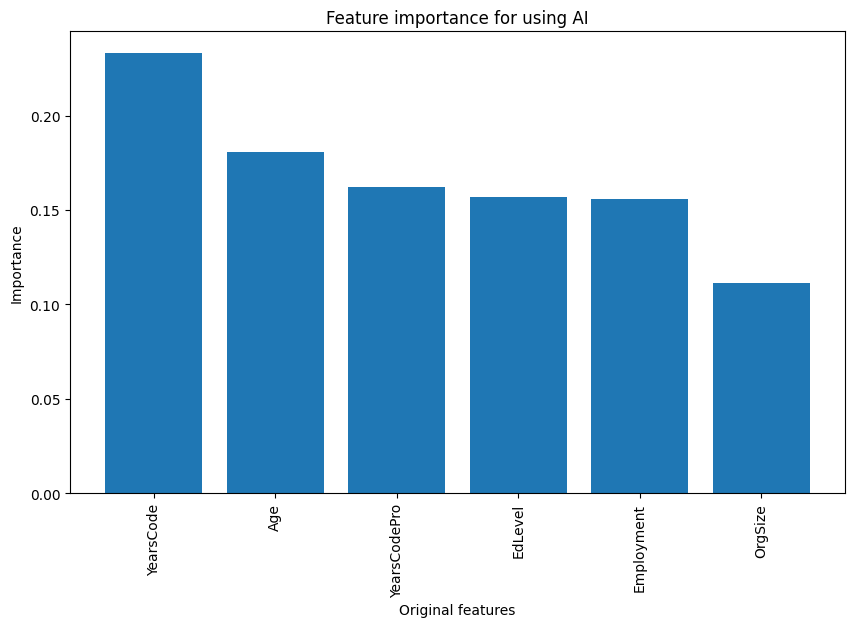

In [11]:
original_feature_map = [name.split('_')[0] for name in feature_names]

df_original_feature_importance = pd.DataFrame({
    "original_feature": original_feature_map,
    "importance": importances
})
aggregated_importance = df_original_feature_importance.groupby("original_feature").sum().sort_values(by="importance", ascending=False).reset_index()

# plot sorted feature list 
plt.figure(figsize=(10,6))
plt.bar(aggregated_importance["original_feature"],aggregated_importance["importance"])
plt.title("Feature importance for using AI")
plt.xticks(rotation=90)
plt.xlabel("Original features")
plt.ylabel("Importance")
plt.show()


## Model data
To predict the use of AI and the planned use based a model is trained using the 5 most important features from the above feature importance analysis. Thus the organization size (OrgSize) is ignored. A a DecisionTreeModel is developed also checking the impact of the tree depth 

In [12]:
df_X_model=df_X.drop(["OrgSize"],axis=1)
current_encoder_opt=OneHotEncoder(sparse_output=False)
X_encoded_model=current_encoder.fit_transform(df_X_model)

In [13]:
X_train_model,X_test_model,y_train_model,y_test_model=train_test_split(X_encoded_model,y_encoded,test_size=0.2,random_state=42)

max_depth_variation_list=[ 5, 10, 15, 20]
for max_depth_value in max_depth_variation_list:
    model_opt=DecisionTreeClassifier(max_depth=max_depth_value,random_state=42)
    model_opt.fit(X_train_model,y_train_model)

    y_pred_train_model = model_opt.predict(X_train_model)
    y_pred_test_model = model_opt.predict(X_test_model)

    acc_train_opt = accuracy_score(y_pred_train_model, y_train_model)
    acc_test_opt = accuracy_score(y_pred_test_model, y_test_model)
    print(f"Accurracy for tree depth {max_depth_value}")
    print(f"\t Training data: {acc_train_opt}")
    print(f"\t Test data    : {acc_test_opt}")

Accurracy for tree depth 5
	 Training data: 0.6210979989738328
	 Test data    : 0.6211623707108849
Accurracy for tree depth 10
	 Training data: 0.6266393022062596
	 Test data    : 0.6173863076670497
Accurracy for tree depth 15
	 Training data: 0.6389533093894305
	 Test data    : 0.611722213101297
Accurracy for tree depth 20
	 Training data: 0.6561313494099538
	 Test data    : 0.6006402889509111


For the selected features and the decision tree classifier a tree depth of 15 is also sufficiently yielding close training and test data still with a very low overall accuracy. 
As a conclusion the selected features cannot be used to reliably predict whether a developer already uses AI tools or plans to use or does not plan to use them. In order to visualize this outcome, a confusion matrix is generated. A sufficient model should have the maximum values on the diagonal. The current model overpredicts the use of AI which is indicated by the vertical yellow bar containing the highest values. 

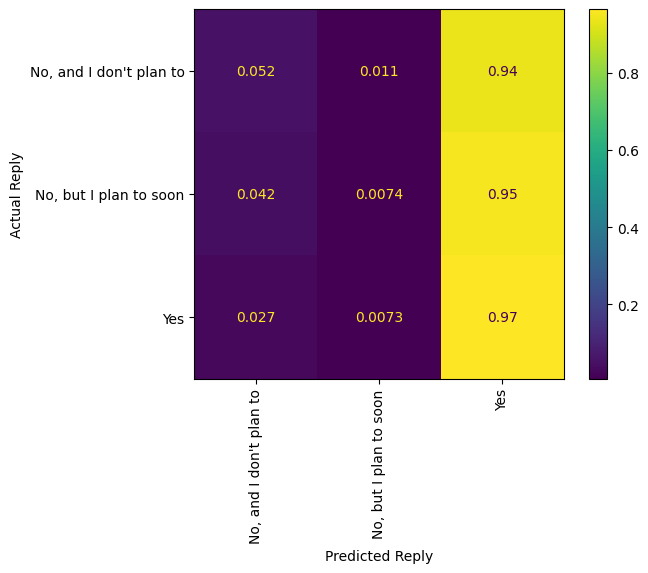

In [14]:
model_eval=DecisionTreeClassifier(max_depth=15,random_state=42)
model_eval.fit(X_train_model,y_train_model)

y_pred_train_eval=model_eval.predict(X_train_model)
y_pred_test_eval=model_eval.predict(X_test_model)

decision_tree_confusion_matrix = confusion_matrix(y_test_model, y_pred_test_eval)
decision_tree_confusion_matrix_normalized = decision_tree_confusion_matrix.astype('float') / decision_tree_confusion_matrix.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix_normalized,display_labels=label_encoder.inverse_transform([0, 1, 2]))
disp.plot()
plt.xticks(rotation=90)
plt.xlabel("Predicted Reply")
plt.ylabel("Actual Reply")
plt.show()